<a href="https://colab.research.google.com/github/danysc/DA-Projects/blob/main/Features_data_set_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Features_data_set_ST

https://www.kaggle.com/manjeetsingh/retaildataset

**With Statistics**


Features
Contains additional data related to the store, department, and regional activity for the given dates.

Store - The store number.

Date - The week.

Temperature - average temperature in the region.

Fuel_Price - cost of fuel in the region.

MarkDown1-5 - Anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

CPI - The consumer price index.

Unemployment - The unemployment rate.

IsHoliday - Whether the week is a special holiday week.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [52]:
# Read the csv from my GitHub
data_set = pd.read_csv('https://raw.githubusercontent.com/danysc/kgdata/main/Features_data_set.csv')
# Printing the first 6 rows of the data frame for visualization
data_set[:6]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.320,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.381,8.106,False


In [53]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [54]:
# Convert the Date column to date format:
data_set['Date'] = pd.to_datetime(data_set['Date'])
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [55]:
#Null Check:
# Note the null values
data_set.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [56]:
# Duplicate check:
# No duplicated row
data_set.duplicated().sum()

0

Good. No duplicate

Because there a lot of Nulls, I decide to delete few columns.

In [57]:
# removing null values to avoid errors 
data_set.dropna(inplace = True)
data_set

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998,7.866,False
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.221,7.866,False
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.468,7.866,True
95,1,2011-02-12,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.715,7.866,False
96,1,2011-09-12,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.962,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,2013-01-03,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122,8.625,False
8169,45,2013-08-03,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.212,8.625,False
8173,45,2013-05-04,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516,8.335,False
8174,45,2013-12-04,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589,8.335,False


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

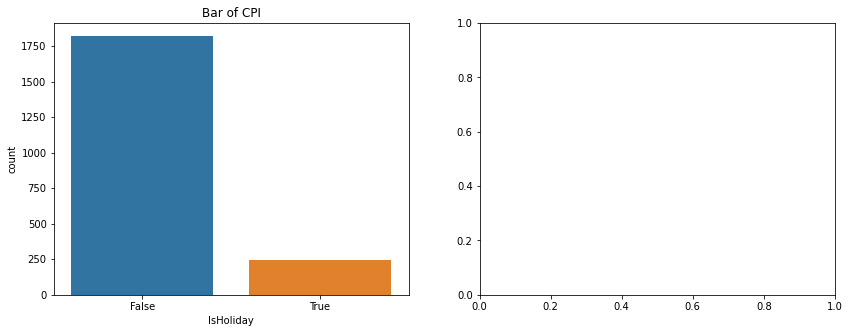

In [59]:
# Graph for Survived count:
# In Bars
plt.subplots(1, 2, figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Bar of CPI")
sns.countplot(x='IsHoliday', data=data_set)

# In Pie Graph
# plt.subplot(1,2,2)
# plt.title("Pie of CPI")
# label=["0", "1"]
# plt.pie(data_set['CPI'].value_counts(),
#        labels=label, counterclock=False, startangle=90,
#        autopct='%1.1f%%', pctdistance=0.7)
# plt.show()

In [60]:

data_set.groupby(['Store']).agg(CPI_mean = ('CPI','mean')).head()


,CPI_mean
Store,
1,221.974
2,221.675
3,225.590
4,131.028
5,222.455


## Statistics

**NumPy Correlation Calculation:**

corrcoef() returns the correlation matrix, which is a two-dimensional array with the correlation coefficients

In [61]:
# NumPy Correlation Calculation:
## https://realpython.com/numpy-scipy-pandas-correlation-python/
# r = np.corrcoef(x, y)
r = np.corrcoef(data_set['Fuel_Price']	, data_set['CPI'])
r

array([[ 1.        , -0.39446808],
       [-0.39446808,  1.        ]])

In [62]:
# Get the Pearson correlation coefficient:
# x.corr(y)
data_set['Fuel_Price'].corr(data_set['CPI'])

-0.3944680808066294

**Pearson correlation coefficient**

In [63]:
import scipy.stats

In [64]:
scipy.stats.pearsonr(data_set['Temperature'], data_set['CPI'])    # Pearson's r

(0.2035920026768376, 8.506210735290963e-21)

In [65]:
scipy.stats.spearmanr(data_set['Temperature'], data_set['CPI'])   # Spearman's rho

SpearmanrResult(correlation=0.20964197345653346, pvalue=5.56041517730163e-22)

In [66]:

scipy.stats.kendalltau(data_set['Temperature'], data_set['CPI'])  # Kendall's tau

KendalltauResult(correlation=0.1408180972084343, pvalue=8.760892060460995e-22)

In [67]:
# If you want to get the Pearson correlation coefficient and p-value at the same time, then you can unpack the return value:

# r, p = scipy.stats.pearsonr(x, y)
r, p = scipy.stats.pearsonr(data_set['Temperature'], data_set['CPI'])
r,p

(0.2035920026768376, 8.506210735290963e-21)

You can use scipy.stats.linregress() to perform linear regression for two arrays of the same length.

.slope: the slope of the regression line/

.intercept: the intercept of the regression line/

.pvalue: the p-value/

.stderr: the standard error of the estimated gradient/


In [68]:
# result = scipy.stats.linregress(x, y)
result = scipy.stats.linregress(data_set['Temperature'], data_set['CPI'])
result

LinregressResult(slope=0.4402050539163686, intercept=152.46912992683673, rvalue=0.20359200267683758, pvalue=8.506210735310206e-21, stderr=0.046561989062515255)

In [69]:
result.intercept

152.46912992683673

In [70]:
result.rvalue

0.20359200267683758

In [71]:
result.pvalue

8.506210735310206e-21

In [72]:
result.stderr

0.046561989062515255